In [1]:
import   numpy                       as  np
import   pandas                      as  pd
import   matplotlib.pyplot           as  plt
import   seaborn                     as  sns
%matplotlib inline
import   scipy.stats                 as stats
import   statsmodels.formula.api     as sm
from     scipy.stats          import    zscore
from     statsmodels.api      import    add_constant
from     sklearn              import    metrics
from     sklearn.tree         import    DecisionTreeClassifier,DecisionTreeRegressor
from     sklearn.ensemble     import RandomForestClassifier, RandomForestRegressor
from     sklearn.linear_model import LinearRegression,LogisticRegression
from     sklearn.neighbors    import KNeighborsClassifier,KNeighborsRegressor
from     sklearn.naive_bayes  import GaussianNB
from     sklearn              import    metrics,tree
from     sklearn.model_selection import train_test_split
from     sklearn.preprocessing import StandardScaler
from     sklearn              import model_selection
from     sklearn.model_selection import cross_val_score
import warnings

In [2]:
house_tt=pd.read_csv('train_house.csv')
r1=house_tt.shape
house_tt.head()
print(r1)
house_tt.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [3]:
house_ts=pd.read_csv('test_house.csv')
r2=house_ts.shape
house_ts.head()
print(r2)
house_ts.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal


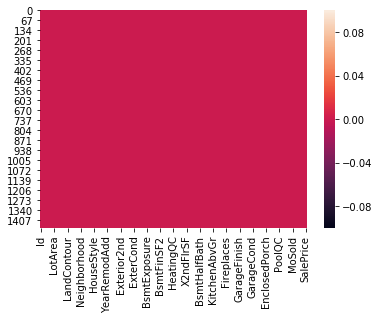

In [4]:
house_tt.isnull().sum().sort_values(ascending=False).head(20)
sns.heatmap(house_tt.isnull())

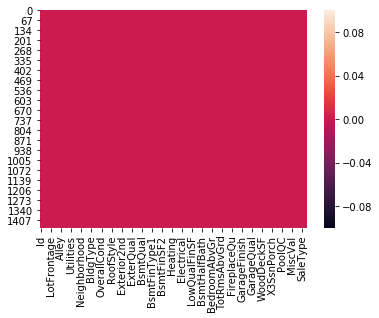

In [5]:
house_ts.isnull().sum().sort_values(ascending=False).head(20)
sns.heatmap(house_ts.isnull())

In [6]:
train=pd.get_dummies(house_tt)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65,8450,7,5,2003,2003,196,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80,9600,6,8,1976,1976,0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68,11250,7,5,2001,2002,162,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60,9550,7,5,1915,1970,0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84,14260,8,5,2000,2000,350,655,...,0,0,0,1,0,0,0,0,1,0


In [7]:
x1=train.drop('SalePrice',axis=1)
y1=train[['SalePrice']]

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x1)
y=sc.fit_transform(y1)

C:\Users\HII\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HII\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HII\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HII\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
x=pd.DataFrame(x,columns=x1.columns)
x.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [10]:
#x.drop('Id',axis=1,inplace=True)


In [11]:
x.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [12]:
# taking a copy of x
x2=x

In [13]:
from sklearn.decomposition import PCA
pc=PCA(n_components=120)
x2=pc.fit_transform(x2)
x2=pd.DataFrame(x2)
x2.shape

(1460, 120)

In [14]:
exvar=pc.explained_variance_ratio_*100
exvar


array([6.27840729, 2.90740471, 2.33636652, 1.95363494, 1.66237799,
       1.59108692, 1.43296121, 1.28845624, 1.27080773, 1.2055089 ,
       1.1535151 , 1.105232  , 1.07015651, 1.04746564, 1.00254029,
       0.97583592, 0.97214799, 0.93603985, 0.9317943 , 0.88734851,
       0.86976488, 0.84921597, 0.84459544, 0.82746478, 0.80996886,
       0.7992598 , 0.79056112, 0.77390338, 0.75615877, 0.75220603,
       0.73999101, 0.73028378, 0.72233962, 0.70786105, 0.70061802,
       0.69384011, 0.68987923, 0.67897518, 0.66480064, 0.64816569,
       0.63983058, 0.63371452, 0.62754761, 0.61237665, 0.60004985,
       0.59810775, 0.59103685, 0.58820065, 0.57268525, 0.56975767,
       0.56628495, 0.55772391, 0.55032132, 0.5454661 , 0.5361942 ,
       0.53325832, 0.52464256, 0.52025179, 0.51539713, 0.51175629,
       0.50508841, 0.49507534, 0.49098907, 0.48376691, 0.48116551,
       0.47904392, 0.47415124, 0.46895108, 0.46512477, 0.46401275,
       0.45594267, 0.451937  , 0.44548235, 0.44246154, 0.44040

In [15]:
pc.get_covariance()

array([[ 0.83040043,  0.01264769,  0.00187633, ...,  0.02924067,
         0.00624748, -0.02309788],
       [ 0.01264769,  1.17981476, -0.36131097, ..., -0.00250781,
         0.02960227, -0.04776777],
       [ 0.00187633, -0.36131097,  0.96528161, ...,  0.01582427,
        -0.07473352,  0.13528185],
       ...,
       [ 0.02924067, -0.00250781,  0.01582427, ...,  0.91494389,
        -0.20713263, -0.01221182],
       [ 0.00624748,  0.02960227, -0.07473352, ..., -0.20713263,
         1.14489669, -0.59562348],
       [-0.02309788, -0.04776777,  0.13528185, ..., -0.01221182,
        -0.59562348,  1.18141569]])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=0)

In [17]:
DT_model=DecisionTreeRegressor()
DT_model.fit(x_train,y_train)
pred1=DT_model.predict(x_test)
Rf_model=RandomForestRegressor()
Rf_model.fit(x_train,y_train)
pred2=Rf_model.predict(x_test)
Lr_model=LinearRegression()
Lr_model.fit(x_train,y_train)
pred4=Lr_model.predict(x_test)
Kn_model=KNeighborsRegressor()
Kn_model.fit(x_train,y_train)
pred5=Kn_model.predict(x_test)

C:\Users\HII\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HII\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
# kfold cross validation
mod=[]
mod.append(('Decision Tree',DT_model))
mod.append(('Random Forest',Rf_model))
#mod.append(('Naive Bayes',Nb_model))
mod.append(('Linear Regression',Lr_model))
mod.append(('KNN',Kn_model))
result=[]
names=[]
#scoring='accuracy'
for name,model in mod:
    scores = cross_val_score(model,x2,y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    cv_results=model.score(x2,y)
    result.append(rmse_scores)
    names.append(name)
    msg="RMSE Score  for %s is %f and R2 value is %f "%(name,rmse_scores.mean(),cv_results)
    print(msg)
# boxplot for the models
fig=plt.figure(figsize=[10,8])
fig.suptitle("RMSE Comparison")
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

In [ ]:
test_col=house_ts.columns

In [ ]:
house_ts=pd.get_dummies(house_ts)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_x=sc.fit_transform(house_ts)


In [ ]:
test_x=pd.DataFrame(test_x,columns=house_ts.columns)
test_x.head()

In [ ]:
from sklearn.decomposition import PCA
pc=PCA(n_components=120)
test_x=pc.fit_transform(test_x)
test_x=pd.DataFrame(test_x)
test_x.shape

In [ ]:
comp=pc.components_
comp

In [ ]:
DT_model=DecisionTreeRegressor()
DT_model.fit(x_train,y_train)
pred1=DT_model.predict(test_x)
Rf_model=RandomForestRegressor()
Rf_model.fit(x_train,y_train)
pred2=Rf_model.predict(test_x)
Lr_model=LinearRegression()
Lr_model.fit(x_train,y_train)
pred4=Lr_model.predict(test_x)
Kn_model=KNeighborsRegressor()
Kn_model.fit(x_train,y_train)
pred5=Kn_model.predict(test_x)

In [ ]:
pred2.size

In [ ]:
pred2

In [ ]:
y=sc.fit_transform(pd.DataFrame(house_tt.SalePrice))
y

In [ ]:
ypred=sc.inverse_transform(pred2)
ypred

In [ ]:
final=np.array(np.ravel(ypred))
print(final.shape)
ID=np.array(house_ts['Id'])
ID.shape
new=pd.DataFrame({'Id':ID,'SalePrice':final})
new.head()

In [ ]:
new.to_csv('SalesPrice_Prediction_PCA.csv',index=False)